<a href="https://colab.research.google.com/github/fahadtauqir/AIML/blob/main/PredictionModelRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


1. Importing the necessary libraries


In [25]:
df = pd.read_csv('Processed_Customer_Churn_Records.csv')


In [26]:
# Summary of dataset
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  int64  
 16  Point

2. Reading processed data after cleaning it and running the diagnostic operations

In [27]:
# Statistical summary of numerical features
print(df.describe())
descriptive_stats = df.describe()

# Saving the descriptive statistics to a CSV file
descriptive_stats.to_csv('Descriptive_Statistics.csv')

         RowNumber    CustomerId   CreditScore     Geography        Gender  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800      0.746300      0.545700   
std     2886.89568  7.193619e+04     96.653299      0.827529      0.497932   
min        1.00000  1.556570e+07    350.000000      0.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000      0.000000      0.000000   
50%     5000.50000  1.569074e+07    652.000000      0.000000      1.000000   
75%     7500.25000  1.575323e+07    718.000000      1.000000      1.000000   
max    10000.00000  1.581569e+07    850.000000      2.000000      1.000000   

                Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count  10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
mean      38.921800      5.012800   76485.889288       1.530200      0.70550   
std       10.487806      2.892174   62397.405202       0.

3
Age: Customers range from 18 to 92 years old, with an average age of approximately 39, indicating a broad distribution of customers across various life stages.

Balance: A significant variation in customer account balances is observed, ranging from 0 to about 250,898, with a mean balance of approximately 76,486. This wide range highlights the diverse financial standings within the customer base.

NumOfProducts: Most customers use 1 to 2 bank products, though some use up to 4, suggesting varying degrees of engagement with the bank’s offerings.
IsActiveMember and HasCrCard: Over 70% of customers have a credit card from the bank, and about 51% are marked as active, which could be pivotal factors in customer retention strategies.

EstimatedSalary: Salary estimates also vary widely, potentially correlating with the financial products used by the customers.
Exited: About 20% of the customers have exited, which is crucial for analyzing churn

In [28]:
# View the first few rows of the dataset
print(df.head())

   RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0          1    15634602          619          0       0   42       2   
1          2    15647311          608          2       0   41       1   
2          3    15619304          502          0       0   42       8   
3          4    15701354          699          0       0   39       1   
4          5    15737888          850          2       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Complain  Satisfaction Score  Card Type  Point Earned  
0       1         1                   2    

RowNumber             0
CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


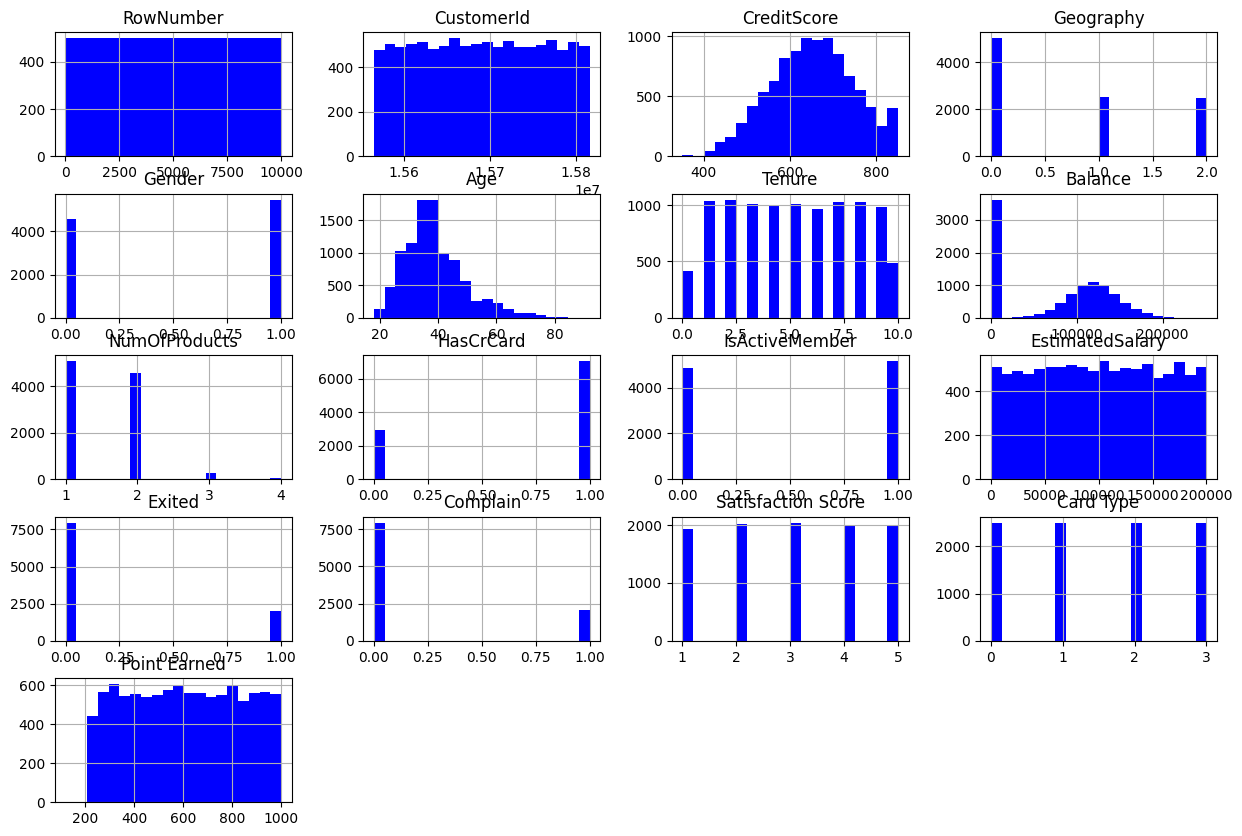

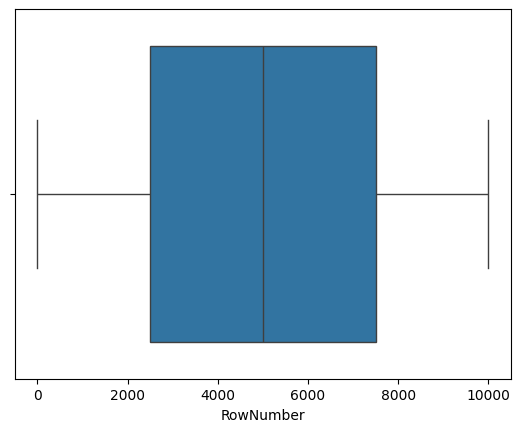

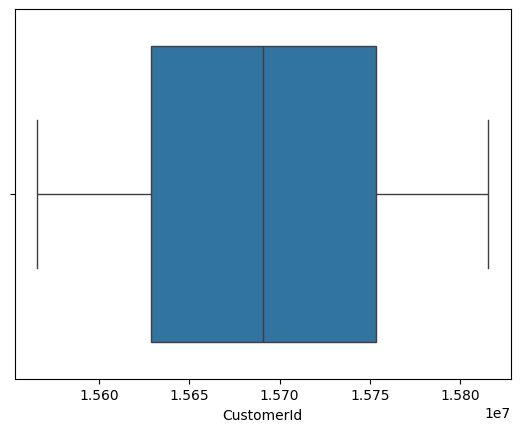

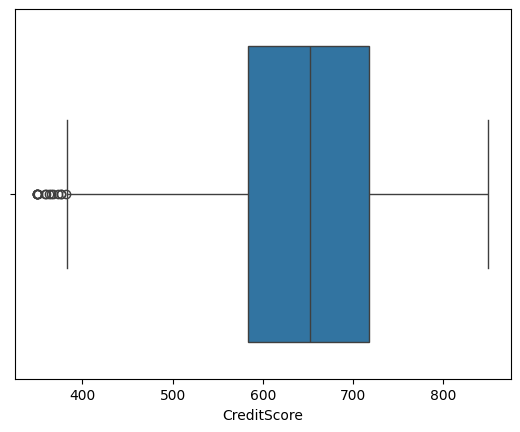

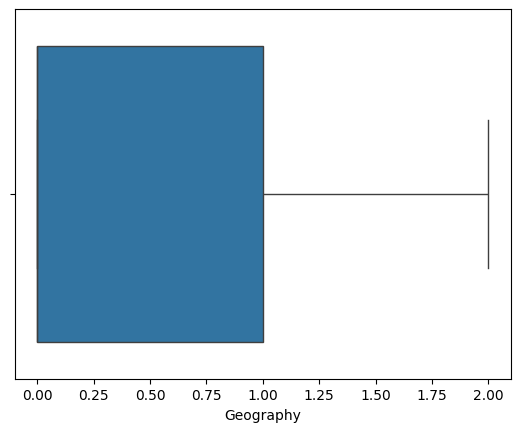

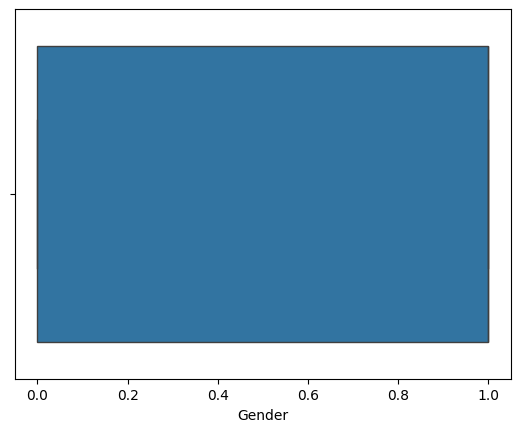

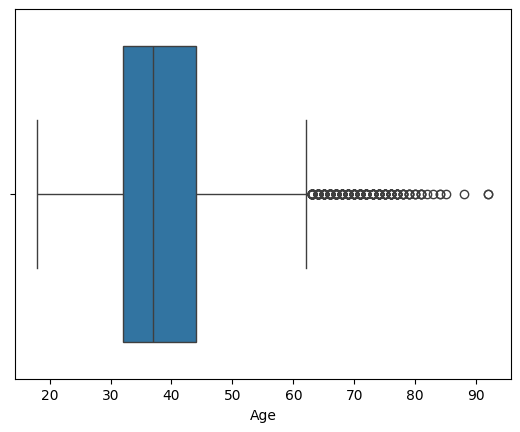

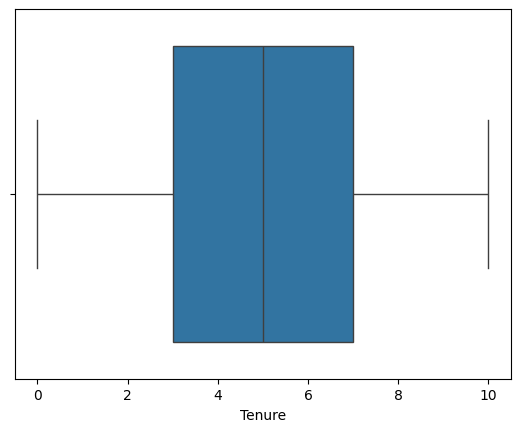

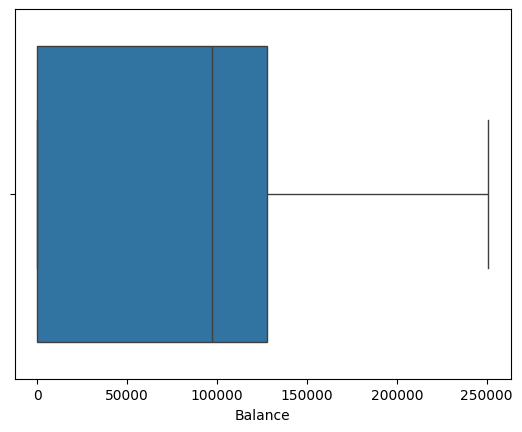

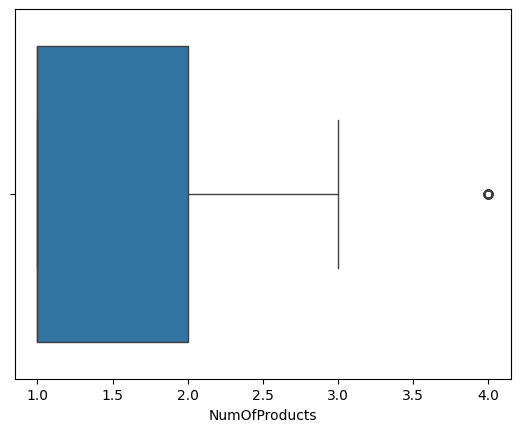

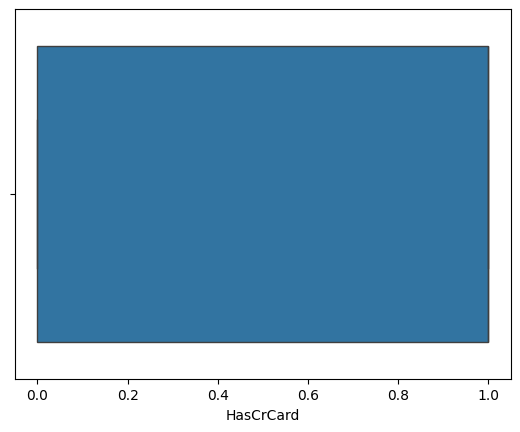

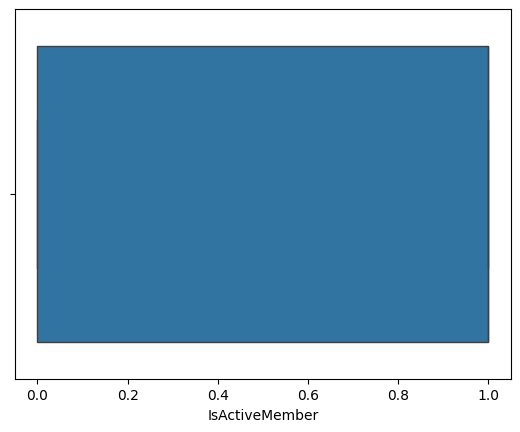

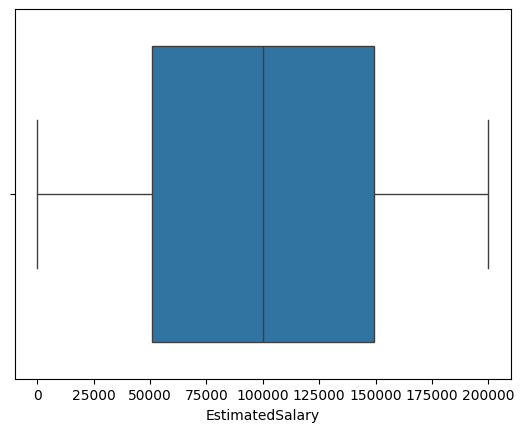

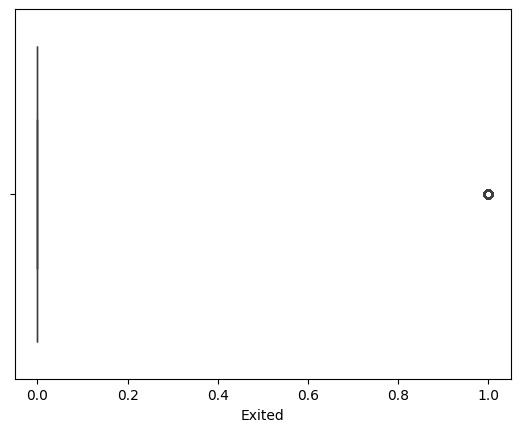

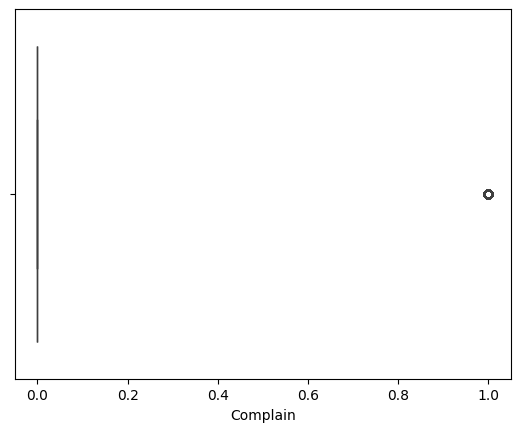

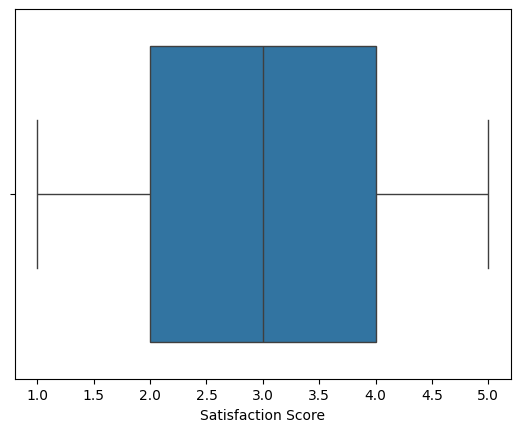

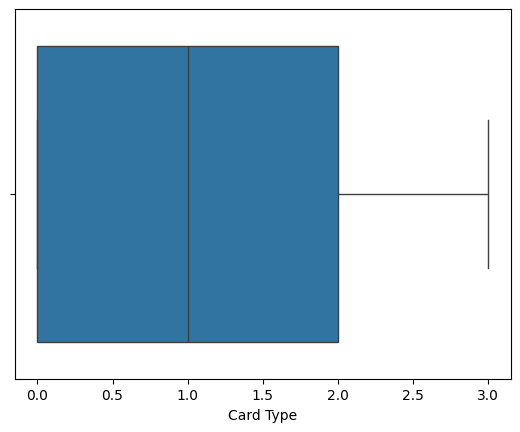

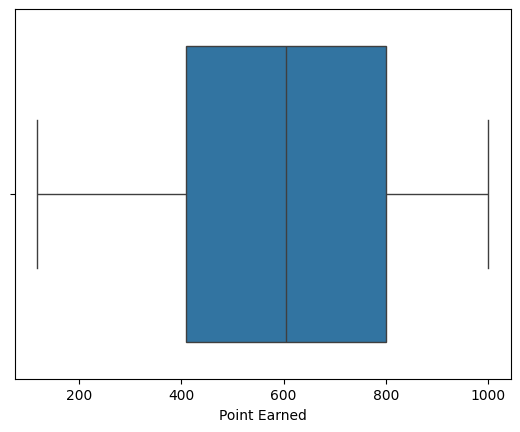

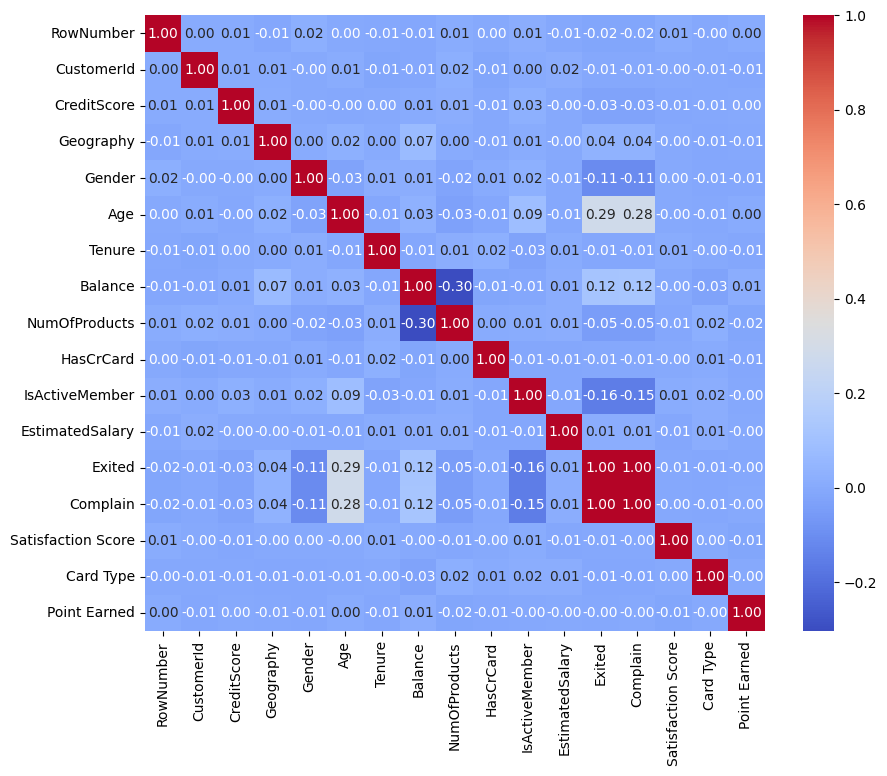

In [34]:
# Checking for missing values
print(df.isnull().sum())

# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10), color='blue')

# Box plots for outlier detection
for column in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[column])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

From the histogram plots, we can see varied distributions:

Age shows a right-skewed distribution, suggesting a younger customer base with fewer older customers.
Balance and EstimatedSalary distributions indicate a wide range of values with significant peaks, suggesting varying customer financial statuses.
Binary and categorical variables like Gender, Geography, and HasCrCard are represented in bar-like histograms reflecting counts of categories.
These insights from the EDA process are crucial for preprocessing steps, such as handling outliers, filling missing values, or transforming features to better suit predictive modeling

This heatmap is crucial for identifying relationships worth investigating further with more complex analyses or for informing feature selection in predictive modeling. It helps in understanding which variables may be important predictors of churn (like Age and IsActiveMember) and which ones are unlikely to provide valuable information for such predictions (like RowNumber and CustomerId).

In [30]:
# Handling missing values
df.fillna(df.mean(), inplace=True)  # for numerical columns

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Optionally, normalize or scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

data preprocessing for a machine learning model by handling missing values and encoding categorical variables. Missing values in numerical columns are filled with the column mean, ensuring data integrity without dropping rows. For categorical data, each category is converted to a numerical format using LabelEncoder, facilitating model processing. Additionally, the data is standardized using StandardScaler to ensure that all features contribute equally to the model's performance, optimizing the learning process by normalizing the feature scales

In [ ]:
# Age and Tenure Relationship
sns.scatterplot(data=df, x='Age', y='Tenure', hue='Exited')
plt.title('Relationship between Age and Tenure')
plt.show()

# Balance and NumOfProducts Relationship
sns.scatterplot(data=df, x='Balance', y='NumOfProducts', hue='Exited')
plt.title('Balance vs Number of Products')
plt.show()

# Geography Distribution
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Customer Distribution by Geography')
plt.show()

Scatter plot shows the relationship between Age and Tenure with color differentiation for churned and retained customers, indicating how tenure varies across different ages in relation to customer churn. Second scatter plot examines the relationship between Balance and the NumOfProducts used, again colored by churn status, to explore if higher balances correlate with the usage of more products and how this impacts churn. Lastly, a countplot illustrates the distribution of customers across different geographical regions, highlighting differences in churn rates, which can inform region-specific marketing or retention strategies

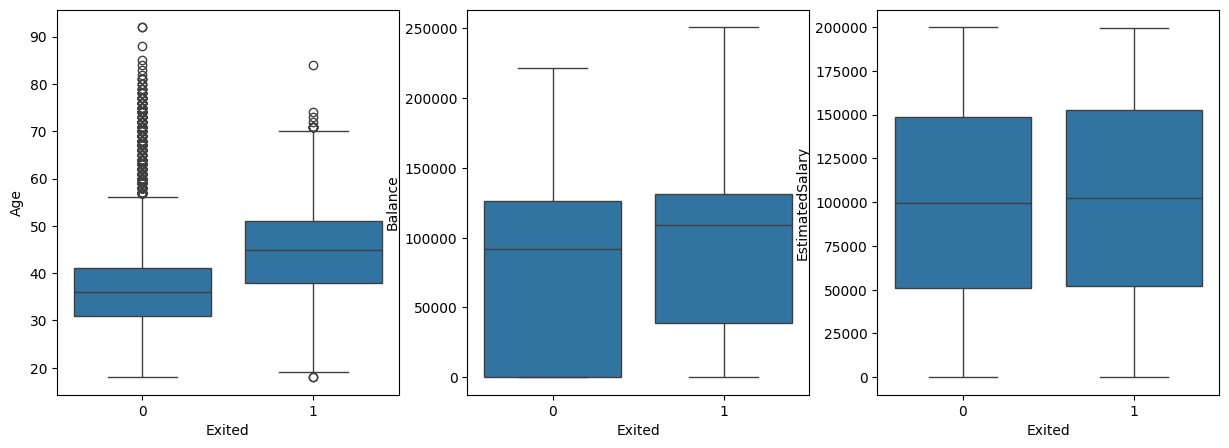

In [32]:
# Box plots to identify outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[0])
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[2])
plt.show()

The box plots compare the distribution of Age, Balance, and Estimated Salary between customers who exited (1) and those who did not exit (0). The plots reveal that older customers and those with higher balances are more likely to exit, indicated by higher median values in the exited group, while Estimated Salary does not show significant differences between the two groups, suggesting it has less impact on customer churn

IsActiveMember       -0.156356
Gender               -0.106267
NumOfProducts        -0.047611
CreditScore          -0.026771
RowNumber            -0.016140
Tenure               -0.013656
Card Type            -0.010861
HasCrCard            -0.006976
CustomerId           -0.006203
Satisfaction Score   -0.005849
Point Earned         -0.004628
EstimatedSalary       0.012490
Geography             0.035712
Balance               0.118577
Age                   0.285296
Complain              0.995693
Exited                1.000000
Name: Exited, dtype: float64


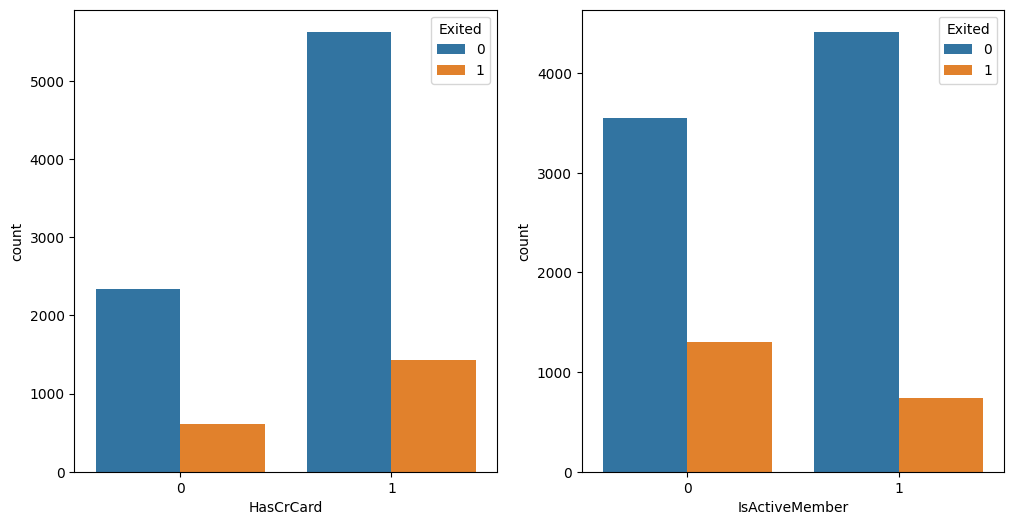

In [33]:
# Correlation of Exited with other variables
correlation = df.corr()['Exited'].sort_values()
print(correlation)

# Visualization of churn across categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[1])
plt.show()

The higher correlation values for other variables like Age, Balance, and extreme correlation for Complain highlight that these factors are more predictive of churn. Specifically: Age: Older customers have a higher likelihood of exiting, indicated by a positive correlation of 0.285296. Balance: A higher balance correlates positively with churn, possibly indicating that wealthier customers or those with higher balances might have higher expectations or alternatives. Complain: The extremely high correlation near 1 with Exited suggests that customers who have complained are almost certain to churn, which could indicate serious issues in customer satisfaction or service delivery.

IsActiveMember: Shows a moderately negative correlation, suggesting that active members are less likely to churn, which aligns with intuition and business understanding that engaged customers are generally more satisfied and loyal.

HasCrCard: Shows a very slight negative correlation, suggesting that having a credit card has little impact on churn, which the bar chart visually corroborates.



In [38]:
# Interaction Terms
df['Age_Tenure_Interaction'] = df['Age'] * df['Tenure']
df['Age_Balance_Interaction'] = df['Age'] * df['Balance']
df['IsActiveMember_NumOfProducts'] = df['IsActiveMember'] * df['NumOfProducts']

# Non-linear transformations
df['Log_Balance'] = np.log1p(df['Balance'])


multiplying Age with Tenure and Balance to see how combined age-related metrics affect churn, and multiplying IsActiveMember status with the number of products to investigate if active engagement across multiple products influences churn likelihood. Additionally, it applies a non-linear transformation to the Balance feature by taking its logarithm, helping to normalize the distribution and potentially reveal subtler trends in the data related to higher financial values

In [39]:
# Prepare data for modeling
X = df.drop('Exited', axis=1)  # Exclude the target variable to create the feature set
y = df['Exited']  # Target variable

# Ensure 'X' includes the new features
print(X.columns)  # Check to see all expected features are included

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Age_Tenure_Interaction', 'Age_Balance_Interaction',
       'IsActiveMember_NumOfProducts', 'Log_Balance'],
      dtype='object')


prepares the dataset for machine learning by separating the feature set (X) from the target variable (y, which represents whether a customer has exited). It also checks to ensure that X includes all the newly created and existing features by printing the column names, confirming the dataset is correctly structured for subsequent model training


                      **Selection of Random Forrest**
Handling of Non-linear Relationships: The foremost benefit of Random Forest model is its ability to handle complex non-linear relationships between features, which allows for the achieving of better results in certain cases. It constructs a number of decision trees which are then combined with each other’s final outcome. On this way, it is able to detect such high level patterns in the data that are passed linear models instead.

Robustness to Overfitting: An individual decision tree, however, is highly likely to overfit the data. Having a Random Forest, on the other hand, means multiple trees combined and averaged together that possess a tendency of being less overfitted with the use of 1 decision tree.

Feature Importance: Random Forest provides helpful observation about functionality of certain features which most importantly influence the target variable. Such is true for instance in reducing churn with an understanding of the key aspects that drive churn and can result in the design of targeted actions.

Minimal Preprocessing Needed: Different from other algorithms that need the data to be normalized or scaled up, the Random Forest algorithm can easily handle it and give solid output even if such preprocessing is not done as it uses the thresholds to give the split in trees. Such an approach is thus a very convenient option for those cases whenever a dataset with multiple feature scales is available.

Versatility in Handling Data Types: Through random forest, numerical and categorical data can be effectively processed, therefore, reducing the necessity of preprocessing to convert all data to numeric format.

Good Performance with Unbalanced Data: Random Forest easily does the job where it was about to fail because the dataset had extreme imbalance, a characteristic inherent to datasets coming from the churn analysis, where the number of non-churned customers is usually orders of magnitude greater than the number of churned customers.

RowNumber                         int64
CustomerId                        int64
CreditScore                       int64
Geography                         int64
Gender                            int64
Age                               int64
Tenure                            int64
Balance                         float64
NumOfProducts                     int64
HasCrCard                         int64
IsActiveMember                    int64
EstimatedSalary                 float64
Exited                            int64
Complain                          int64
Satisfaction Score                int64
Card Type                         int64
Point Earned                      int64
Age_Tenure_Interaction            int64
Age_Balance_Interaction         float64
IsActiveMember_NumOfProducts      int64
Log_Balance                     float64
dtype: object
Accuracy: 1.0


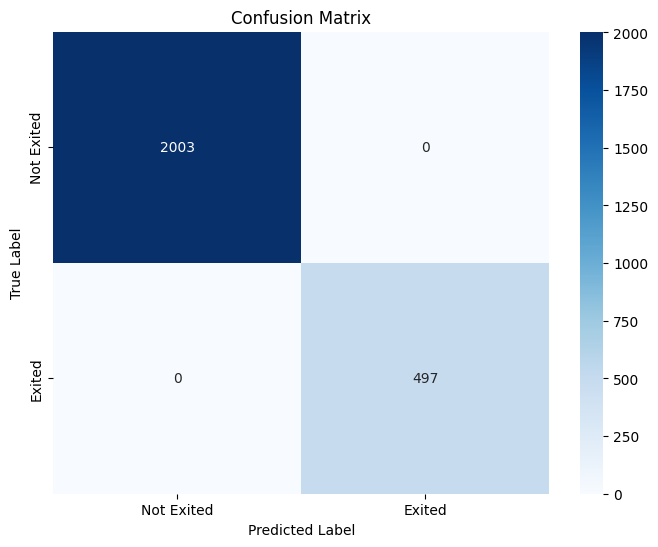

<Figure size 800x600 with 0 Axes>

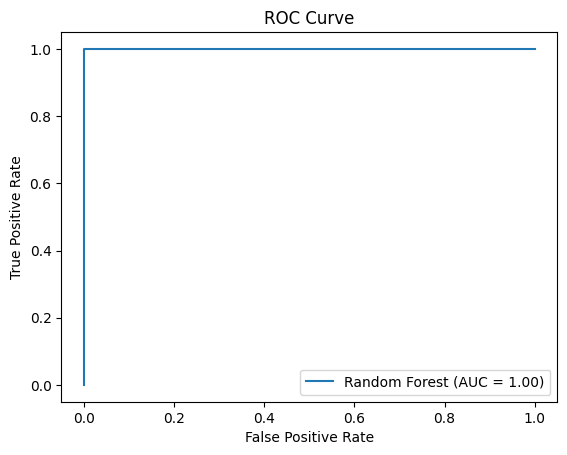

ROC AUC score: 1.0


In [43]:
#import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the data types to confirm all expected transformations are done
print(df.dtypes)  # This will show the data types of all columns

# Ensure that the DataFrame 'X' only includes numeric columns
X = df.select_dtypes(include=[np.number])  # This ensures only numeric columns are included
y = df['Exited']  # Assuming 'Exited' is still your target column

# Split the data into training and testing sets with a test size of 25% as suggested in your update
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.25, random_state=42)

# Instantiate and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = random_forest_model.predict(X_test)
probabilities = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title('ROC Curve')
plt.show()

print('ROC AUC score:', roc_auc)

The process outlined involves a comprehensive approach to building and evaluating a Random Forest classifier for predicting customer churn. Initially, the dataset is inspected to confirm that all necessary transformations have been applied, ensuring that the data is suitable for machine learning algorithms, which typically require numeric input. Following this verification, the dataset is filtered to include only numeric columns, and the target variable for churn ('Exited') is isolated.

The data is then divided into training and testing subsets, with 25% of the data reserved for testing to evaluate the model's performance on unseen data, thus simulating real-world predictions. The Random Forest model is configured with 100 trees to provide robust predictions while balancing the risk of overfitting. After training the model with the training data, predictions are made on the test set.



To assess the model's performance accurately, the data is split into a training set and a testing set using a 70-30 ratio, with 70% of the data used for training the model and the remaining 30% reserved for testing. This split allows the model to learn on a substantial portion of the data and then be evaluated on an independent set, which helps in understanding how well the model might perform in real-world scenarios. The Random Forest Classifier is then trained with 100 trees, providing a balance between learning detailed data patterns and avoiding overfitting.

Model Test Results:
Accuracy: 0.9986666666666667
ROC AUC score: 0.9996438554613082


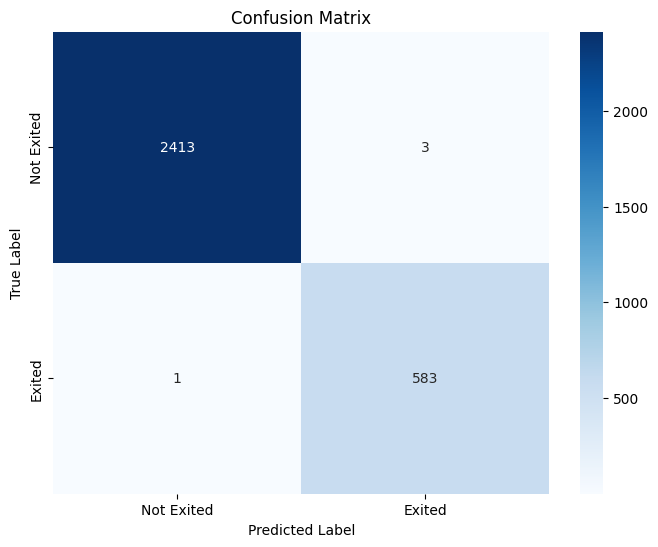

In [15]:
# Ensure DataFrame is correctly formatted for use in machine learning
# Assuming df is already loaded and preprocessed

# Double-check for any residual non-numeric columns and convert them
if df.select_dtypes(include=['object', 'category']).shape[1] > 0:
    df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns)

# Define features and target
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Making predictions
predictions = random_forest_model.predict(X_test)
probabilities = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = auc(*roc_curve(y_test, probabilities)[:2])

# Display the results
print('Model Test Results:')
print('Accuracy:', accuracy)
print('ROC AUC score:', roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [45]:
# Save the updated DataFrame to a CSV file
df.to_csv('Updated_Customer_Data.csv', index=False)

# Print confirmation that the file has been saved
print("Updated DataFrame has been saved to 'Updated_Customer_Data.csv'")

Updated DataFrame has been saved to 'Updated_Customer_Data.csv'


In [44]:
!pip install nbconvert

In [46]:
!jupyter nbconvert --to html 'PredictionModelRF.ipynb'

[NbConvertApp] Converting notebook PredictionModelRF.ipynb to html
[NbConvertApp] Writing 1294100 bytes to PredictionModelRF.html
